In [3]:
'''numpy>차원이 다양한 대신 내부 데이터 타입은 같다고 가정, Pandas>차원이 2차원(table), 내부 데이터 타입은 다양 
2차원 테이블> 열:데이터 타입에 대한 설명 행:각 값을 구분
다음과 같이 import해서 쓴다.
'''
import pandas as pd

#Series: 인덱스(index)가 있는 1차원 배열
s = pd.Series([1, 3, 5, 7, 9])
print(s)
print(s[2]) #indexing >앞의 값, 인덱스 자동 생성

# dictionary를 이용해 만들기
dic = {'a':1, 'b':3, 'c':5}
s = pd.Series(dic)
print(s)
print(s['b']) #indexing

#dic이랑 series가 비슷함

#딕셔너리와 다른 점: 순서가 있다!
s = pd.Series([1,3,5,7,9], index=['LGT','DOO','HWE','LOT','SKW'])
#print(s)
#print(s['LOT'])
print(s[:'LOT']) # 슬라이싱에서 어디까지 나오는지 주목

# 시리즈를 딕셔너리로 변환
d = s.to_dict()
print(type(d), d)

0    1
1    3
2    5
3    7
4    9
dtype: int64
5
a    1
b    3
c    5
dtype: int64
3
LGT    1
DOO    3
HWE    5
LOT    7
dtype: int64
<class 'dict'> {'LGT': 1, 'DOO': 3, 'HWE': 5, 'LOT': 7, 'SKW': 9}


In [ ]:
'''데이터 프레임은 우리에게 친숙한 2차원 표와 같은 형태로 생각하면 된다.
행(row)과 열(column)으로 이루어져 있으며, 각 열에는 name이 있고 행에는 index가 있다.'''

score={'학번':[201700013,201600023,201600033],
       '이름':['변사또','이몽룡','성춘향'],
       '퀴즈':[15,20,10],
       '중간고사':[20,20,15]}

score_df= pd.DataFrame(score) #여러 개의 dic을 data frame으로 바꿈 
score_df

#행>index 열>col name // series로 뜯으면 행>index가 index // col>colname이 index 

print(type(score_df['학번'])) #colname을 키로 받음
score_df['학번'] #series로 뜯어온 거
#score_df[['학번']] #data frame으로 뜯어온 거
#>> 타입이 다름 print(type(score_df[['학번']]))

#score_df[0] #key 오류 / colname이 default 
#score_df[['학번','Quiz']] 여러값을 원하면 리스트에 넣고 요청해야함 

In [ ]:
'''행 추가하기
loc를 이용해서 추가가 가능
단 행의 인덱스가 0부터 시작해서 순차적으로 더해진 경우에 아래와 같이 할 수 있음 append 지원안함 comcat'''
print(len(score_df))
score_df.loc[len(score_df)] = [201700002, '이몽룡', 17, 17]
score_df

In [15]:
df = pd.read_csv('RegularSeasonCompactResults.csv') #옵션이 여러 개 

In [23]:
df.head() #앞에 5개 (x) x원하는 갯수

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
5,1985,25,1218,79,1337,78,H,0
6,1985,25,1228,64,1226,44,N,0
7,1985,25,1242,58,1268,56,N,0
8,1985,25,1260,98,1133,80,H,0
9,1985,25,1305,97,1424,89,H,0


In [17]:
df.tail() #뒤에 5개 

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
161547,2019,132,1153,69,1222,57,N,0
161548,2019,132,1209,73,1426,64,N,0
161549,2019,132,1277,65,1276,60,N,0
161550,2019,132,1387,55,1382,53,N,0
161551,2019,132,1463,97,1217,85,H,0


In [21]:
df.shape #행,열 수
df.columns #pandas에서 관리하는 인덱스들의 리스트 index에 담겨 있음 
df.columns.tolist() #index를 벗긴 리스트

(161552, 8)

In [25]:
df.describe() #통계
#aggregation Numpy > 전체에서 값 1개 Pandas > col별로 1개씩 

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,161552.000000,161552.000000,161552.000000,161552.000000,161552.000000,161552.000000,161552.000000
mean,2003.228731,74.665359,1286.919004,76.795125,1282.637498,64.692526,0.045137
std,10.058660,33.670352,104.521630,12.066260,104.742961,11.349610,0.249751
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1995.000000,47.000000,1198.000000,69.000000,1191.000000,57.000000,0.000000
50%,2004.000000,77.000000,1284.000000,76.000000,1280.000000,64.000000,0.000000
75%,2012.000000,103.000000,1380.000000,84.000000,1375.000000,72.000000,0.000000
max,2019.000000,132.000000,1466.000000,186.000000,1466.000000,150.000000,6.000000


In [31]:
df.max() #최대값
df['WScore'].max() #특정 열의 최대 값 


64.69252624541943

In [ ]:
df['LScore'].mean() #특정 열의 평균 값

In [127]:
df['WScore'].argmax() #특정 열의 최대인 행의 위치(index)
#향후에는 argmax 대신 idxmax를 쓰도록 친절하게 권장하므로 이후부터는 idxmax로 고쳐서 쓴다.

24970

In [33]:
df.loc[24970] #행에 대한 인덱싱 

Season     1991
DayNum       68
WTeamID    1258
WScore      186
LTeamID    1109
LScore      140
WLoc          H
NumOT         0
Name: 24970, dtype: object

In [35]:
df['WLoc'].value_counts() #특정 열에 사용된 값 횟수(특정 갯수) 

WLoc
H    95878
A    49260
N    16414
Name: count, dtype: int64

In [21]:
df.info() #col별 정보 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161552 entries, 0 to 161551
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   161552 non-null  int64 
 1   DayNum   161552 non-null  int64 
 2   WTeamID  161552 non-null  int64 
 3   WScore   161552 non-null  int64 
 4   LTeamID  161552 non-null  int64 
 5   LScore   161552 non-null  int64 
 6   WLoc     161552 non-null  object
 7   NumOT    161552 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 9.9+ MB


In [ ]:
Wscore = df['Wscore'] #열을 기준으로 인덱싱을 하면 특정 열의 값만을 추출
Wscore.head() #갯수가 너무 많으므로 뒤에 head()함수를 써서 앞부분만 추출

In [37]:
df['WScore'].idxmax()
#argmax(),iloc vs idxmax(),loc 
#position(location) vs index
#arg VS idx https://stackoverflow.com/questions/47596390/can-i-use-idxmax-instead-of-argmax-in-all-cases
#iloc vs loc https://stackoverflow.com/questions/31593201/how-are-iloc-and-loc-different

24970

In [135]:
biggest=df['WScore'].idxmax() #가장 큰 값 집어넣기 

In [133]:
df.loc[df['WScore'].idxmax()] #loc안에 idxmax집어 넣기 

Season     1991
DayNum       68
WTeamID    1258
WScore      186
LTeamID    1109
LScore      140
WLoc          H
NumOT         0
Name: 24970, dtype: object

In [5]:
a = {
    'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
   'Rahul','David','Andrew','Ajay','Teresa'],
   'Age':[26,27,25,34,31,27,25,33,42,32,51,47],
   'Score':[89,87,67,55,55,72,76,79,44,92,89,69]}
 
af = pd.DataFrame(a)
af

,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,34,55
4,Rocky,31,55
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


In [9]:
af=af.reindex([1,4,6,2,3,5,9,8,0,7,11,10]) #인덱스 재정렬 (명시적 인덱스)
af

,Name,Age,Score
1,Bobby,27,87
4,Rocky,31,55
6,Jaqluine,25,76
2,Cathrine,25,67
3,Madonna,34,55
5,Sebastian,27,72
9,Andrew,32,92
8,David,42,44
0,Alisa,26,89
7,Rahul,33,79


In [11]:
#Pandas에는 순차 인덱스를 제공함 
af.loc[:6] #6개가 아니라 3개만 나옴 또한 6인 애가 포함이 됨 ,문자열 index 사용가능 

,Name,Age,Score
1,Bobby,27,87
4,Rocky,31,55
6,Jaqluine,25,76


In [111]:
af.iloc[:6] #6개 ,문자열 index 사용 불가 , np와 같음

,Name,Age,Score
1,Bobby,27,87
4,Rocky,31,55
6,Jaqluine,25,76
2,Cathrine,25,67
3,Madonna,34,55
5,Sebastian,27,72


In [11]:
af #slicing 해도 변수값은 그대로

,Name,Age,Score
1,Bobby,27,87
4,Rocky,31,55
6,Jaqluine,25,76
2,Cathrine,25,67
3,Madonna,34,55
5,Sebastian,27,72
9,Andrew,32,92
8,David,42,44
0,Alisa,26,89
7,Rahul,33,79


In [113]:
af2=af.sort_index(ascending=False) #내림차순 ==reserve=True
af2.iloc[3:5, 0:1] #행 렬 다 추출 가능 , 숫자 사용

,Name
8,David
7,Rahul


In [119]:
af2.loc[11:7,['Name','Age']] #행 렬 다 추출 가능 , index 사용 
af2.loc[11:7,'Name':'Score'] #slicing 사용가능 
#slicing할 때 마지막 index> iloc은 불포함(일반적인 컴퓨터 언어), loc은 포함(상식)

,Name,Age,Score
11,Teresa,47,69
10,Ajay,51,89
9,Andrew,32,92
8,David,42,44
7,Rahul,33,79


In [23]:
af.iloc[af['Score'].argmax()] #Series

Name     Andrew
Age          32
Score        92
Name: 9, dtype: object

In [29]:
af.iloc[[af['Score'].argmax()]] #dataframe

,Name,Age,Score
9,Andrew,32,92


In [33]:
df.iloc[3] #Series

Season     1985
DayNum       25
WTeamID    1165
WScore       70
LTeamID    1432
LScore       54
WLoc          H
NumOT         0
Name: 3, dtype: object

In [31]:
df.iloc[[3]] #dataframe

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
3,1985,25,1165,70,1432,54,H,0


In [121]:
af2.loc[af2['Score'].idxmax()]

Name     Andrew
Age          32
Score        92
Name: 9, dtype: object

In [23]:
df.loc[[df['WScore'].idxmax()]]['LScore'] #이긴 팀의 점수가 가장 높은 경기에서 진 팀의 점수만 가져오고 싶다면 아래와 같이 쓴다. (dataframe) 

24970    140
Name: LScore, dtype: int64

In [17]:
df.loc[[df['LScore'].idxmin()]]['WScore'] #진 팀의 점수가 가장 낮은 경기에서 이긴 팀의 점수만 가져오고 싶다면 아래와 같이 쓴다.(dataframe) 

100027    49
Name: WScore, dtype: int64

In [19]:
df.loc[df['LScore'].idxmin()]['WScore'] #진 팀의 점수가 가장 낮은 경기에서 이긴 팀의 점수만 가져오고 싶다면 아래와 같이 쓴다.(Series) 

49

In [ ]:
#df[df['LScore'] == df['LSocre'].min()]

In [123]:
df.loc[df['WScore'].idxmax(), 'LScore']

140

In [29]:
df.iloc[df['WScore'].argmax(), 5]

140

In [117]:
df.sort_values('LScore').head() #내부에 기준값
#값 저장 > 원본에 변경값 집어넣기 df= ~~~ or df.sort_values('LScore', inplace=True)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
100027,2008,66,1203,49,1387,20,H,0
49310,1997,66,1157,61,1204,21,H,0
89021,2006,44,1284,41,1343,21,A,0
85042,2005,66,1131,73,1216,22,H,0
103660,2009,26,1326,59,1359,22,H,0


In [ ]:
df[df['WScore'] > 150].head() # Boolean Series를 이용해 조건이 True인 행들만 추출

In [51]:
print(type(df['WScore'] > 150))  #True/False 시리즈로 반환되는지 확인
(df['WScore'] > 150).head() # 시리즈의 앞부분을 확인

<class 'pandas.core.series.Series'>


0    False
1    False
2    False
3    False
4    False
Name: WScore, dtype: bool

In [53]:
df[df['WScore'] > 150].head() # df에서 df WScore의 값이 150이상인 값을 불러와라 == Boolean Series를 이용해 조건이 True인 행들만 추출

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
5269,1986,75,1258,151,1109,107,H,0
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
16040,1989,40,1328,152,1331,122,H,0
16853,1989,68,1258,162,1109,144,A,0


In [57]:
df[(df['WScore'] > 150) & (df['LScore'] < 100)] # Boolean 두가지 이상의 조건을 줄 수 있음 

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
12046,1988,40,1328,152,1147,84,H,0
12355,1988,52,1328,151,1173,99,N,0
25656,1991,84,1106,151,1212,97,H,0
28687,1992,54,1261,159,1319,86,H,0
35023,1993,112,1380,155,1341,91,A,0
52600,1998,33,1395,153,1410,87,H,0


In [85]:
#groupby() SQL의 groupby 기능 
df['WTeamID'].value_counts() #>>숫자 세는 거 

WTeamID
1181    901
1242    884
1246    845
1314    839
1112    820
       ... 
1465     12
1466      7
1289      6
1118      6
1327      3
Name: count, Length: 366, dtype: int64

In [75]:
df.groupby('WTeamID') #WTEAM대로 그룹을 나눔 1181>> 901개의 data 1242>>884개의 data

In [77]:
df.groupby('WTeamID')['WScore'].mean().head()
#WTEAMID로 각각 데이터를 나눠서
#WSCORE에서 무언가를 하겠다
#mean>>평균 head>>앞에서 5개
#WTEAM의 이긴점수의 각각의 평균이 나오고 그중에 앞에서(높은 성적에서) 5개 
#즉 1101팀은 이겼을 때 75점을 평균으로 내고 이겼다.

WTeamID
1101    75.500000
1102    70.675439
1103    75.989492
1104    75.834586
1105    74.788360
Name: WScore, dtype: float64

In [81]:
df.groupby('WTeamID')['WLoc'].value_counts().head(9)
#WTEAMID로 각각 데이터를 나눠서
#WLoc에서 무언가를 하겠다
#value_counts()>>각각의 갯수 세기 head(9)>>앞에서 9개
#팀별로 3개씩이므로 9개를 불러와야 3팀의 H,A,N이 나옴
#WTEAM의 이긴점수의 각각의 평균이 나오고 그중에 앞에서(높은 성적에서) 5개 
#즉 1101팀은 이겼을 때 75점을 평균으로 내고 이겼다.

WTeamID  WLoc
1101     H        31
         A        23
         N         8
1102     H       228
         A        79
         N        35
1103     H       359
         A       163
         N        49
Name: count, dtype: int64

In [87]:
print(type(df.values)) #numpy값으로 바뀜>억지로 끼워맞춤==object클래스로 다 맞춰버림
df.values

<class 'numpy.ndarray'>


array([[1985, 20, 1228, ..., 64, 'N', 0],
       [1985, 25, 1106, ..., 70, 'H', 0],
       [1985, 25, 1112, ..., 56, 'H', 0],
       ...,
       [2019, 132, 1277, ..., 60, 'N', 0],
       [2019, 132, 1387, ..., 53, 'N', 0],
       [2019, 132, 1463, ..., 85, 'H', 0]], dtype=object)

In [89]:
#iterrows() 함수를 사용하면 데이터프레임의 행 단위로 순환이 가능하다. 각 행은 시리즈 형태로 반환된다.
for index, row in df.iterrows():
    print('#Data type of row:', type(row))
    print(row)
    if index == 1:
        break

#Data type of row: <class 'pandas.core.series.Series'>
Season     1985
DayNum       20
WTeamID    1228
WScore       81
LTeamID    1328
LScore       64
WLoc          N
NumOT         0
Name: 0, dtype: object
#Data type of row: <class 'pandas.core.series.Series'>
Season     1985
DayNum       25
WTeamID    1106
WScore       77
LTeamID    1354
LScore       70
WLoc          H
NumOT         0
Name: 1, dtype: object


In [91]:
df[['WScore', 'LScore']].head() #두 개 이상의 열을 반환하고 싶으면 아래와 같이 리스트 형태로 인덱싱을 한다.

,WScore,LScore
0,81,64
1,77,70
2,63,56
3,70,54
4,86,74


In [93]:
df.loc[:, ['WScore', 'LScore']].head() #아래와 같이 loc을 사용해서 인덱싱을 할 수도 있다.

,WScore,LScore
0,81,64
1,77,70
2,63,56
3,70,54
4,86,74


In [95]:
df[0:3] #[] 안에 열의 이름이 아닌 숫자를 쓰면 행을 반환하는 것이 가능하다. 단 이 경우는 슬라이싱만 가능하다.

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0


In [97]:
#데이터 클리닝 pandas는 결측값 여부를 반환하는 isnull 함수가 있다. 아래와 같이 sum() 함수와 결합하면 각 열의 결측값 수를 알 수 있다
df.isnull() #element wise로 반환

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
dtype: int64

In [99]:
df.isnull().sum() #element wise를 각각의 col별로 

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
dtype: int64

In [101]:
df.isnull().sum(axis=0) 

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
dtype: int64

In [103]:
df.isnull().sum(axis=1) 

0         0
1         0
2         0
3         0
4         0
         ..
161547    0
161548    0
161549    0
161550    0
161551    0
Length: 161552, dtype: int64

In [133]:
#df1 = pd.read_csv('sample.csv')
df1 = pd.read_csv('sample.csv',index_col=1) #sn을 인덱스로 해서 불러옴
df1
#NAN vs NULL Pandas에선 null==nan

,name,mid,final,quiz
sn,,,,
1001,Park,70.0,60.0,10
1002,Kim,80.0,75.0,10
1003,Lee,NaN,NaN,10
1004,Kang,90.0,49.0,10


In [135]:
df1['mid'].idxmax()

1004

In [137]:
df1['mid'].argmax()

3

In [107]:
df1.isnull().sum()

name     0
sn       0
mid      1
final    1
quiz     0
dtype: int64

In [109]:
#결측치를 처리하는 일반적인 방법으로 다음과 같은 두 함수가 있다.

#dropna() - 결측치가 있는 모든 행을 없앤다.
#fillna() - 결측치를 정해진 값으로 바꾼다.
#열을 없애는 법
#이상치 >평균에서 너무 벗어난 이상한 값을 없앤다.

df1.fillna(0) #결측치를 0으로 바꾼다.

,name,sn,mid,final,quiz
0,Park,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
2,Lee,1003,0.0,0.0,10
3,Kang,1004,90.0,49.0,10


In [113]:
df1.fillna(10) #결측치를 10으로 바꾼다.

,name,sn,mid,final,quiz
0,Park,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
2,Lee,1003,10.0,10.0,10
3,Kang,1004,90.0,49.0,10


In [111]:
df1.dropna() #값 버리기 

,name,sn,mid,final,quiz
0,Park,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
3,Kang,1004,90.0,49.0,10


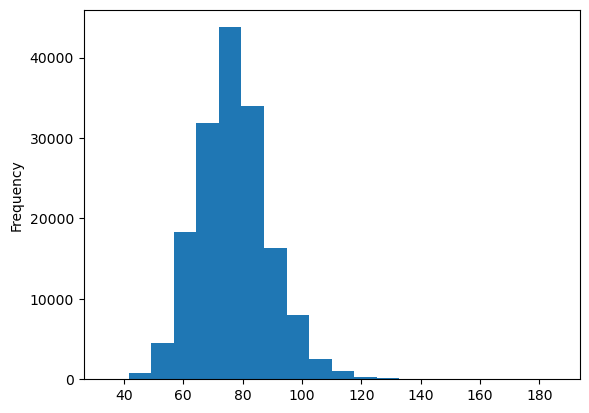

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
ax = df['WScore'].plot.hist(bins=20)

In [119]:
#CSV 파일로 데이터프레임 저장 => to_csv() 함수를 사용
df1.fillna(0).to_csv('test.csv')
df2 = pd.read_csv('test.csv') #index=0이 없으면 index가 Unnamed가 되어있음. 이름이 없으면 unnamed라고 이름을 자동으로 붙여버림
df2

,Unnamed: 0,name,sn,mid,final,quiz
0,0,Park,1001,70.0,60.0,10
1,1,Kim,1002,80.0,75.0,10
2,2,Lee,1003,0.0,0.0,10
3,3,Kang,1004,90.0,49.0,10


In [121]:
#첫째 방법
df1.fillna(0).to_csv('test.csv', index=False) #인덱스를 저장하지 않음
df2 = pd.read_csv('test.csv')
df2

,name,sn,mid,final,quiz
0,Park,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
2,Lee,1003,0.0,0.0,10
3,Kang,1004,90.0,49.0,10


In [129]:
#둘째 방법
df1.fillna(0).to_csv('test.csv')
df2 = pd.read_csv('test.csv', index_col=0) #첫 열을 인덱스로 저장
df2

,name,sn,mid,final,quiz
0,Park,1001,70.0,60.0,10
1,Kim,1002,80.0,75.0,10
2,Lee,1003,0.0,0.0,10
3,Kang,1004,90.0,49.0,10
